In [8]:
import ROOT ,os, sys , math
from ROOT import  TPlots
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import numpy as np , pandas as pd
from root_numpy import root2array, tree2array , hist2array

In [2]:
runs = [93]#80 , 68 , 72 , 74]

In [3]:
Path = "/Users/erezcohen/Desktop/DataMining/AnaFiles"
chain = ROOT.TChain("anaTree")
for run in runs:
    chain.Add(Path + "/Ana_GSIM_run%04d_eep.root"%run)
T = tree2array(chain,branches=['Np_g','Np','protons[0].Theta()','protons[0].P()','protons_g[0].Theta()','protons_g[0].P()'])
# ana = TPlots( Path + "/" + FileName + ".root" , "anaTree" )

In [4]:
Np = T['Np']
Np_g = T['Np_g']
pMag_acc, pTheta_acc = T['protons_g[0].P()'][T['Np']==1]  , T['protons_g[0].Theta()'][T['Np']==1]
pMag_acc, pTheta_acc = pMag_acc.astype('float') ,  pTheta_acc.astype('float')
pMag_gen, pTheta_gen = T['protons_g[0].P()'][T['Np_g']==1], T['protons_g[0].Theta()'][T['Np_g']==1]
pMag_gen, pTheta_gen = pMag_gen.astype('float'),  pTheta_gen.astype('float')
p_accepted = np.ones(len(T))*[1 if Np[i]==1 else 0 for i in range(len(T))]
data = {'pMag_gen':pMag_gen, 'pTheta_gen':pTheta_gen,'p_accepted':p_accepted}
df = pd.DataFrame(data,columns = ['pMag_gen', 'pTheta_gen', 'p_accepted'])

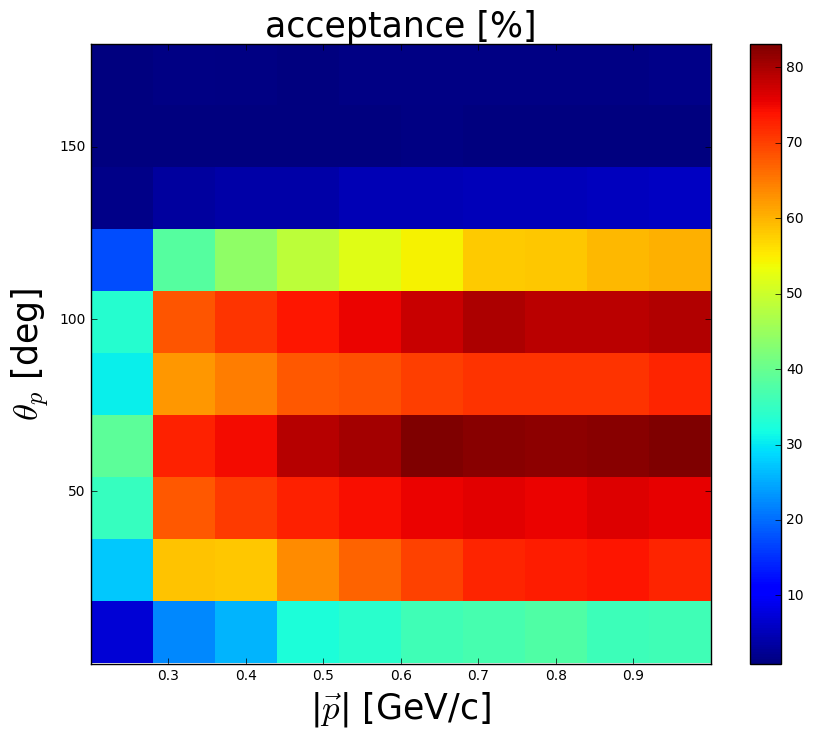

In [13]:
bins=10
fig= plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
hGenerated,xedges,yedges=np.histogram2d( df.pMag_gen , (180./3.1415)*df.pTheta_gen, bins=bins )
hAccepted,xedges,yedges=np.histogram2d( df.pMag_gen , (180./3.1415)*df.pTheta_gen, weights=df.p_accepted, bins=bins )
hAcceptance = 100*hAccepted/hGenerated
extent = [xedges.min(),xedges.max(),yedges.min(),yedges.max()]
im = ax.imshow(np.ma.masked_where(hAcceptance==0,hAcceptance).T
               , interpolation='none'
               , origin='lower'
               , extent=extent, aspect='auto')
# divider = make_axes_locatable(ax)
cbar = fig.colorbar(im)
plt.title('acceptance [%]',fontsize=25)
plt.xlabel(r'|$\vec{p}$| [GeV/c]',fontsize=25)
plt.ylabel(r'$\theta_{p}$ [deg]',fontsize=25)
plt.savefig('/Users/erezcohen/Desktop/acceptance_pTheta_pMag.png')

In [14]:
df.to_csv('accpetance_p_theta.csv')
print "df:",df;

df:         pMag_gen  pTheta_gen  p_accepted
0       0.846740    2.144486         0.0
1       0.299619    0.872878         1.0
2       0.821660    0.430405         1.0
3       0.629404    2.670461         0.0
4       0.497360    2.810350         0.0
5       0.972925    2.428045         0.0
6       0.987491    2.483249         0.0
7       0.909559    0.409018         1.0
8       0.892324    2.078762         1.0
9       0.223167    1.504951         0.0
10      0.913564    2.459114         0.0
11      0.817405    0.907239         0.0
12      0.851035    2.515676         0.0
13      0.249295    2.132753         0.0
14      0.274316    2.421469         0.0
15      0.926482    1.532824         1.0
16      0.345717    2.886270         0.0
17      0.641686    0.471951         1.0
18      0.902930    2.941108         0.0
19      0.681584    2.201734         1.0
20      0.932220    0.731407         1.0
21      0.808962    1.050632         0.0
22      0.837818    2.692063         0.0
23      0.35